<a href="https://colab.research.google.com/github/FriteSansSel/Stroke_Dataset/blob/main/AAA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet stroke prediction

Ce projet vise à analyser et à explorer un dataset contenant des informations de santé de patients pour identifier les facteurs de risque associés aux AVC. L'objectif est d'utiliser des techniques d'analyse exploratoire et de machine learning pour mieux comprendre comment certaines variables influencent la probabilité d'AVC. Le modèle devra être capable de prédire si un individu a ou non un risque d'AVC.

Dataset URL : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

Github du projet : https://github.com/FriteSansSel/Stroke_Dataset

# 1) Initialisation

# Import des bibliothèques

In [31]:
import numpy as np
import os
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer

# Constantes

In [17]:
numerical_features = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]

# Téléchargement des données

In [10]:
DATA_URL = "https://raw.githubusercontent.com/FriteSansSel/Stroke_Dataset/refs/heads/main/healthcare-dataset-stroke-data.csv"
DATA_PATH = os.path.join("datasets", "stroke_data")
os.makedirs(DATA_PATH, exist_ok=True)

# 2) Description des données

In [11]:
df = pd.read_csv(DATA_URL)

# Afficher les informations générales
print("Nombre d'instances:", df.shape[0])
print("Nombre de features:", df.shape[1])
print(df.info())

Nombre d'instances: 5110
Nombre de features: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


id est un identifiant unique et peut être ignoré pour l'analyse.

gender, ever_married, work_type, Residence_type, et smoking_status sont des features catégorielles et peuvent nécessiter un encodage.

age, hypertension, heart_disease, avg_glucose_level, et bmi sont des features numériques.

stroke est la cible que l'on souhaite prédire.

In [5]:
# vérifie les valeurs manquantes
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Les valeurs manquantes sont affichées pour chaque feature. Ici, la feature bmi a 201 valeurs manquantes.

Comme la feature bmi a un faible nombre de valeurs manquantes, on va supprimer les lignes avec les valeurs manquantes.

In [33]:
df_dropped = df.dropna(subset=["bmi"])

# 3) Visualisation des données

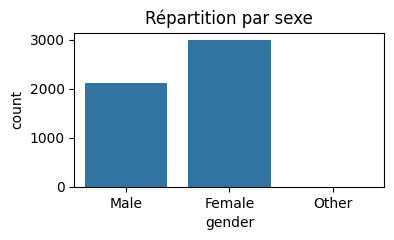

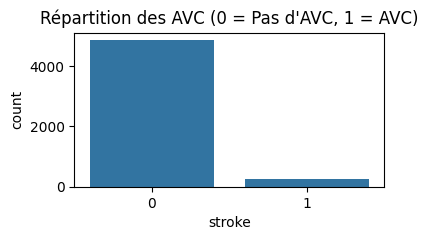

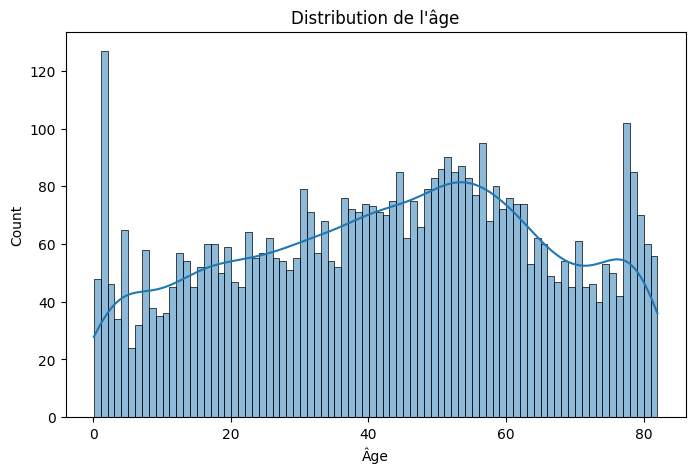

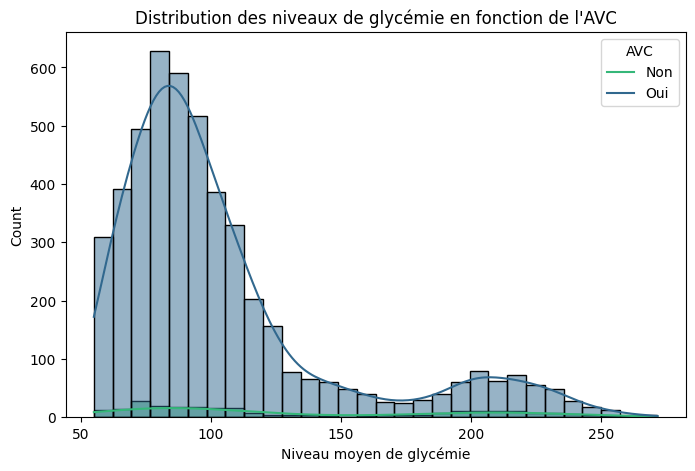

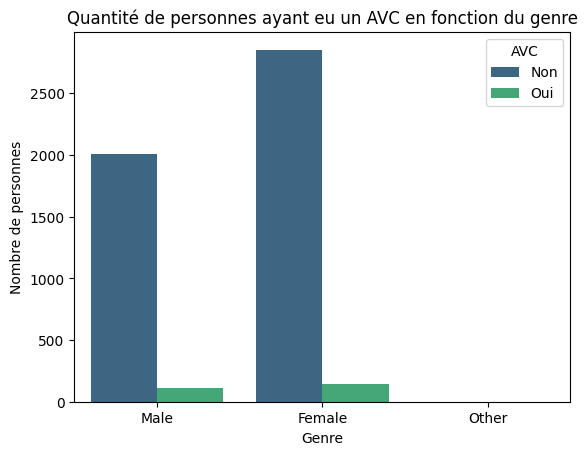

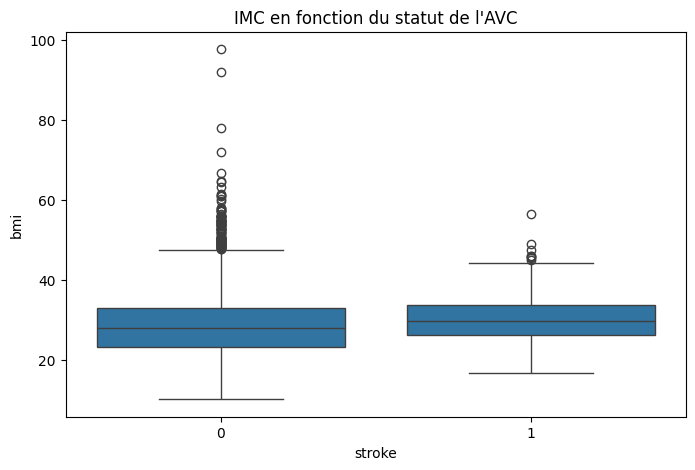

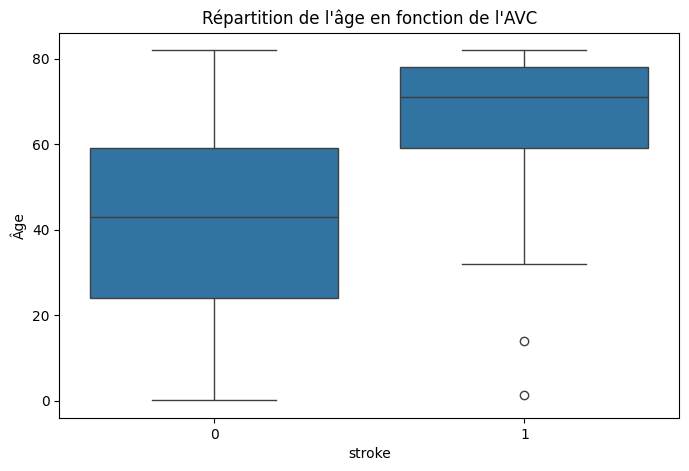

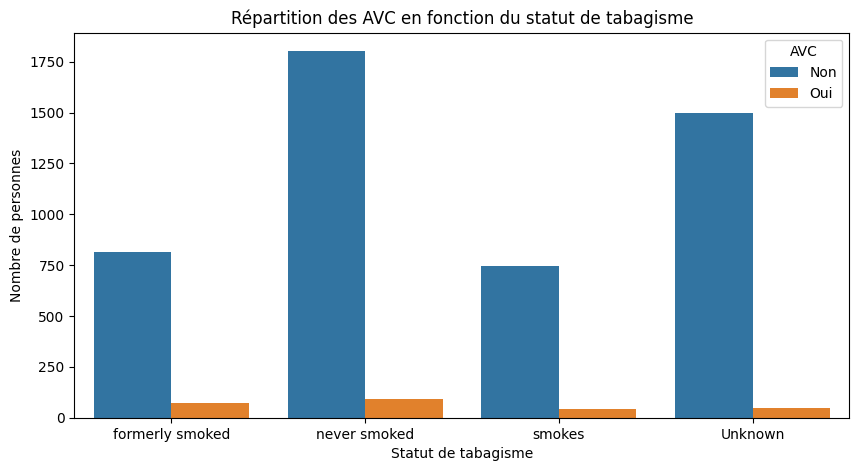

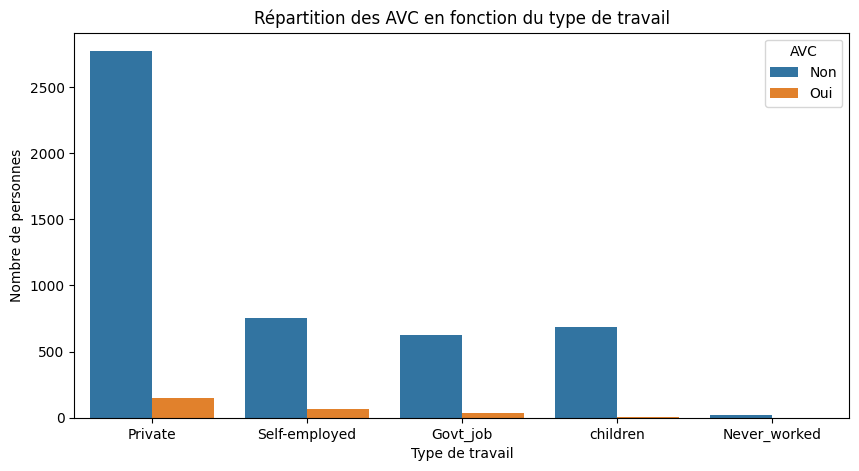

In [6]:
# Diagramme en barres du sexe
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x="gender")
plt.title("Répartition par sexe")
plt.show()

# Diagramme en barres pour les AVC
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x="stroke")
plt.title("Répartition des AVC (0 = Pas d'AVC, 1 = AVC)")
plt.show()

# Histogramme de l'âge
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=82, kde=True)
plt.title("Distribution de l'âge")
plt.xlabel("Âge")
plt.show()

# Histogramme de la glycémie moyenne pour les personnes ayant eu un AVC
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="avg_glucose_level", hue="stroke", kde=True, palette="viridis", bins=30)
plt.title("Distribution des niveaux de glycémie en fonction de l'AVC")
plt.xlabel("Niveau moyen de glycémie")
plt.legend(title="AVC", labels=["Non", "Oui"])
plt.show()

# Graphique montrant le nombre de personnes ayant eu un AVC par genre
sns.countplot(data=df, x="gender", hue="stroke", palette="viridis")
plt.title("Quantité de personnes ayant eu un AVC en fonction du genre")
plt.xlabel("Genre")
plt.ylabel("Nombre de personnes")
plt.legend(title="AVC", labels=["Non", "Oui"])  # 0 = Non, 1 = Oui
plt.show()

# Boxplot de l'IMC en fonction du statut de l'AVC
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="stroke", y="bmi")
plt.title("IMC en fonction du statut de l'AVC")
plt.show()

# Boxplot de l'âge en fonction de l'AVC
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="stroke", y="age")
plt.title("Répartition de l'âge en fonction de l'AVC")
plt.ylabel("Âge")
plt.show()

# Diagramme en barres de l'AVC en fonction du statut de tabagisme
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="smoking_status", hue="stroke")
plt.title("Répartition des AVC en fonction du statut de tabagisme")
plt.xlabel("Statut de tabagisme")
plt.ylabel("Nombre de personnes")
plt.legend(title="AVC", labels=["Non", "Oui"])
plt.show()

# Diagramme en barres de l'AVC en fonction du type de travail
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="work_type", hue="stroke")
plt.title("Répartition des AVC en fonction du type de travail")
plt.xlabel("Type de travail")
plt.ylabel("Nombre de personnes")
plt.legend(title="AVC", labels=["Non", "Oui"])
plt.show()

Les stratégies possible sont:

-Suppression des outliers pour les valeurs extrêmes si elles sont peu nombreuses.

-Transformations comme log pour stabiliser la distribution.

Ici, on va stabiliser la distribution car nous avons beaucoup de outliers.

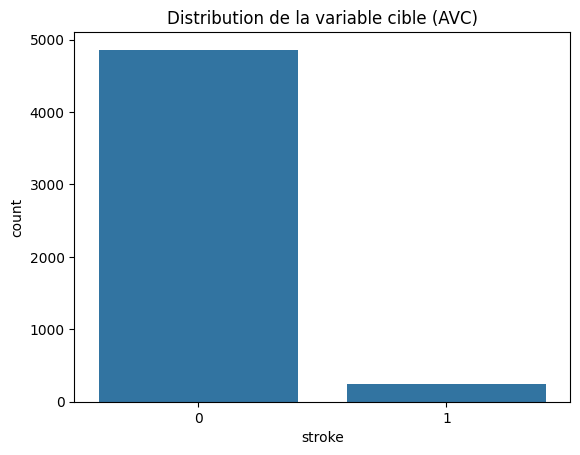

Proportion de chaque classe :
 stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


In [13]:
# Distribution de la cible
sns.countplot(data=df, x="stroke")
plt.title("Distribution de la variable cible (AVC)")
plt.show()

# Vérifier l'équilibre de classe
stroke_ratio = df['stroke'].value_counts(normalize=True)
print("Proportion de chaque classe :\n", stroke_ratio)

Le dataset est déséquilibré, il y a beaucoup plus de 0 que de 1 dans stroke, cela pourrait poser un problème pour les modèles prédictifs.

On peut utiliser du sous-échantillonnage sur la classe 0 pour équilibrer les classes.

# 4) Analyse des données

In [7]:
print(df.describe())

print("Âge moyen:", df['age'].mean())
print("Écart-type de l'âge:", df['age'].std())
print("IMC moyen:", df['bmi'].mean())
print("Écart-type de l'IMC:", df['bmi'].std())
print("Taux d'AVC dans le dataset :", df['stroke'].mean())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

# Matrice de corrélation

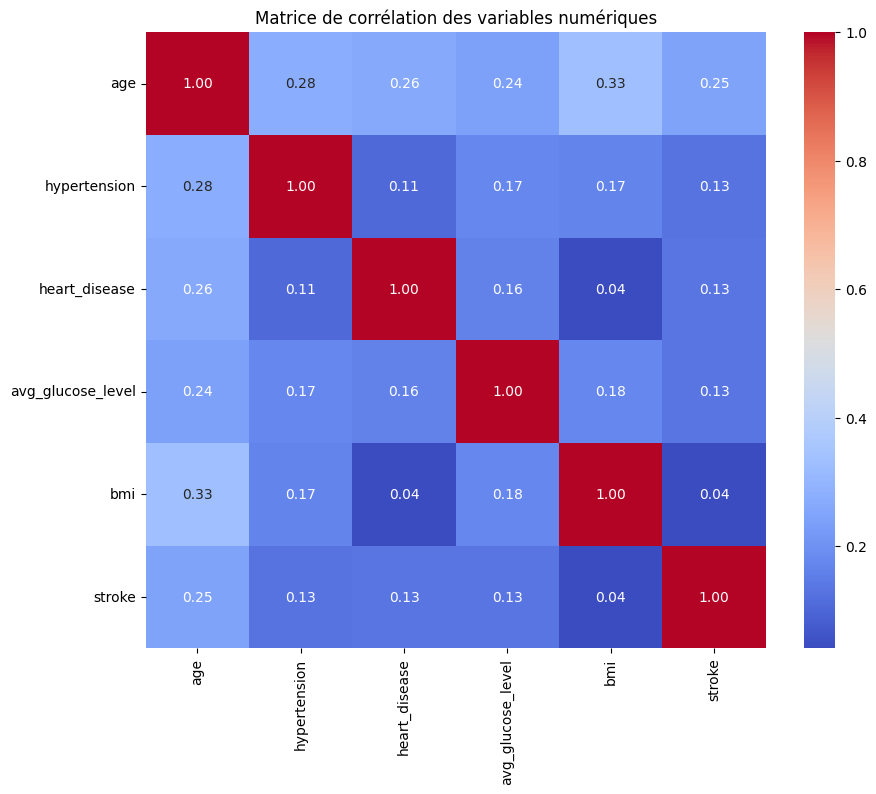

In [8]:
df_num = df[numerical_features]

plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

Pour les features où la corrélation est faibles, on peut appliquer des transformations.

On peut faire une réduction de dimension (PCA) pour capturer l'information des variables corrélées dans un espace de dimension réduite.

# Unsupervised clustering

<ipython-input-38-a26acae40703>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["age"] = np.log1p(df_dropped["age"])
<ipython-input-38-a26acae40703>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["avg_glucose_level"] = np.log1p(df_dropped["avg_glucose_level"])
<ipython-input-38-a26acae40703>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

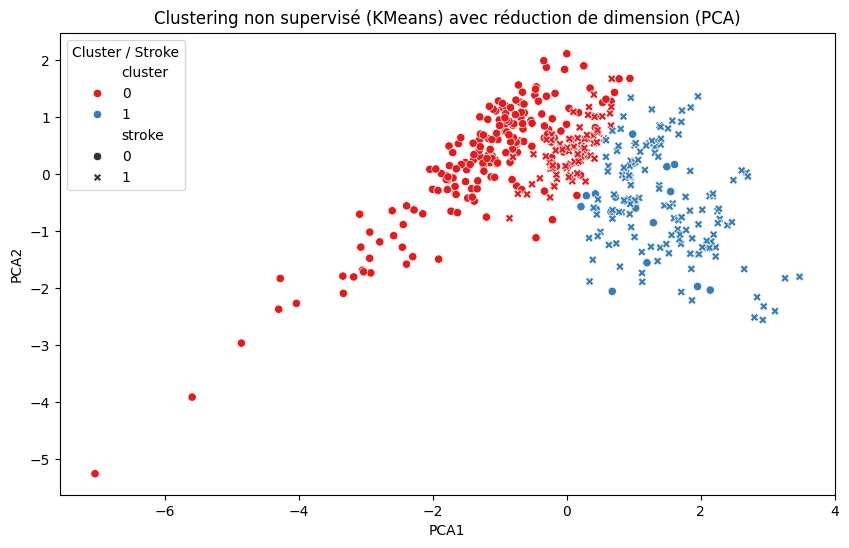

In [38]:
# Transformation log des variables numériques pour stabiliser la distribution
# Nous appliquons log aux colonnes contenant des outliers
df_dropped["age"] = np.log1p(df_dropped["age"])
df_dropped["avg_glucose_level"] = np.log1p(df_dropped["avg_glucose_level"])
df_dropped["bmi"] = np.log1p(df_dropped["bmi"])

# Fonction de sous-échantillonnage de la classe majoritaire
def downsample_class(df, target="stroke"):
    # Séparer les classes
    majority_class = df[df[target] == 0]
    minority_class = df[df[target] == 1]
    # Sous-échantillonnage de la classe majoritaire
    majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
    return pd.concat([majority_downsampled, minority_class])

df_balanced = downsample_class(df_dropped)

# Pipeline de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("log_transform", FunctionTransformer(np.log1p, validate=True)),  # Transformation logarithmique
            ("scaler", StandardScaler())                               # Standardisation
        ]), numerical_features)
    ])

# Pipeline complète
pipeline = Pipeline([
    ("preprocessor", preprocessor),   # Étape de prétraitement
    ("pca", PCA(n_components=2)),     # Réduction de dimension avec PCA
    ("kmeans", KMeans(n_clusters=2, random_state=42))  # Clustering avec KMeans
])

# Appliquer la pipeline
df_balanced.reset_index(drop=True, inplace=True)  # Réindexer après suppression de lignes
pipeline.fit(df_balanced[numerical_features])

# Obtenir les résultats du clustering
df_balanced[["PCA1", "PCA2"]] = pipeline.named_steps["pca"].transform(
    pipeline.named_steps["preprocessor"].transform(df_balanced[numerical_features])
)
df_balanced["cluster"] = pipeline.named_steps["kmeans"].labels_

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_balanced, x="PCA1", y="PCA2", hue="cluster", style="stroke", palette="Set1")
plt.title("Clustering non supervisé (KMeans) avec réduction de dimension (PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster / Stroke")
plt.show()

Les deux clusters formés semblent bien séparés dans l'espace. On observe que les deux clusters contiennent des individus des deux classes (stroke = 0 et stroke = 1).
Toutefois, il semble que les cas d'AVC se répartissent dans les deux clusters, sans qu’un cluster soit nettement plus associé aux individus ayant eu un AVC.

Les deux clusters montrent des différences significatives dans les variables comme l’âge, le niveau moyen de glucose ou le BMI, qui ont été transformés avec PCA. Les clusters pourraient être influencés par des profils différents de ces variables sans pour autant être directement liés à l'AVC.

L’absence de lien apparent entre un cluster spécifique et la classe stroke = 1 pourrait indiquer que les variables choisies, après transformation, ne sont pas les principaux indicateurs d'AVC ou que l'information d'AVC est noyée dans les autres variations des données.

Ce clustering n'indique pas de séparation évidente liée aux cas d'AVC, mais il révèle des groupes potentiellement distincts dans d'autres dimensions. On pourrait tester des approches alternatives pour explorer plus en profondeur la relation entre les données et l'AVC.
